In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./../Docs/DATA/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
X=df.drop('class', axis=1)
X=pd.get_dummies(X, drop_first=True)

y=df['class']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
param_grid={
    'n_estimators':[50, 100],
    'learning_rate':[0.1, 0.05, 0.2],
    'max_depth':[3, 4, 5]
}

In [9]:
gb_model=GradientBoostingClassifier()

In [10]:
grid=GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid
)

In [11]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [12]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [13]:
preds=grid.predict(X_test)
preds

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [14]:
grid.best_estimator_

GradientBoostingClassifier()

In [15]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [16]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [17]:
feat_import=grid.best_estimator_.feature_importances_

In [19]:
imp_feat=pd.DataFrame(index=X.columns, data=feat_import, columns=['Importance'])
imp_feat

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,3.518183e-17
cap-shape_k,3.031753e-17
cap-shape_s,0.000000e+00
cap-shape_x,8.101059e-17
...,...
habitat_l,0.000000e+00
habitat_m,1.201408e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [25]:
imp_feat=imp_feat[imp_feat['Importance']>0.0005]
imp_feat=imp_feat.sort_values('Importance')
imp_feat

,Importance
population_y,0.000550
odor_c,0.000624
stalk-color-below-ring_w,0.000810
stalk-color-above-ring_w,0.000817
cap-surface_g,0.001045
stalk-color-above-ring_n,0.001149
stalk-surface-above-ring_k,0.001629
ring-type_p,0.001825
cap-color_y,0.002422
stalk-surface-below-ring_s,0.002541


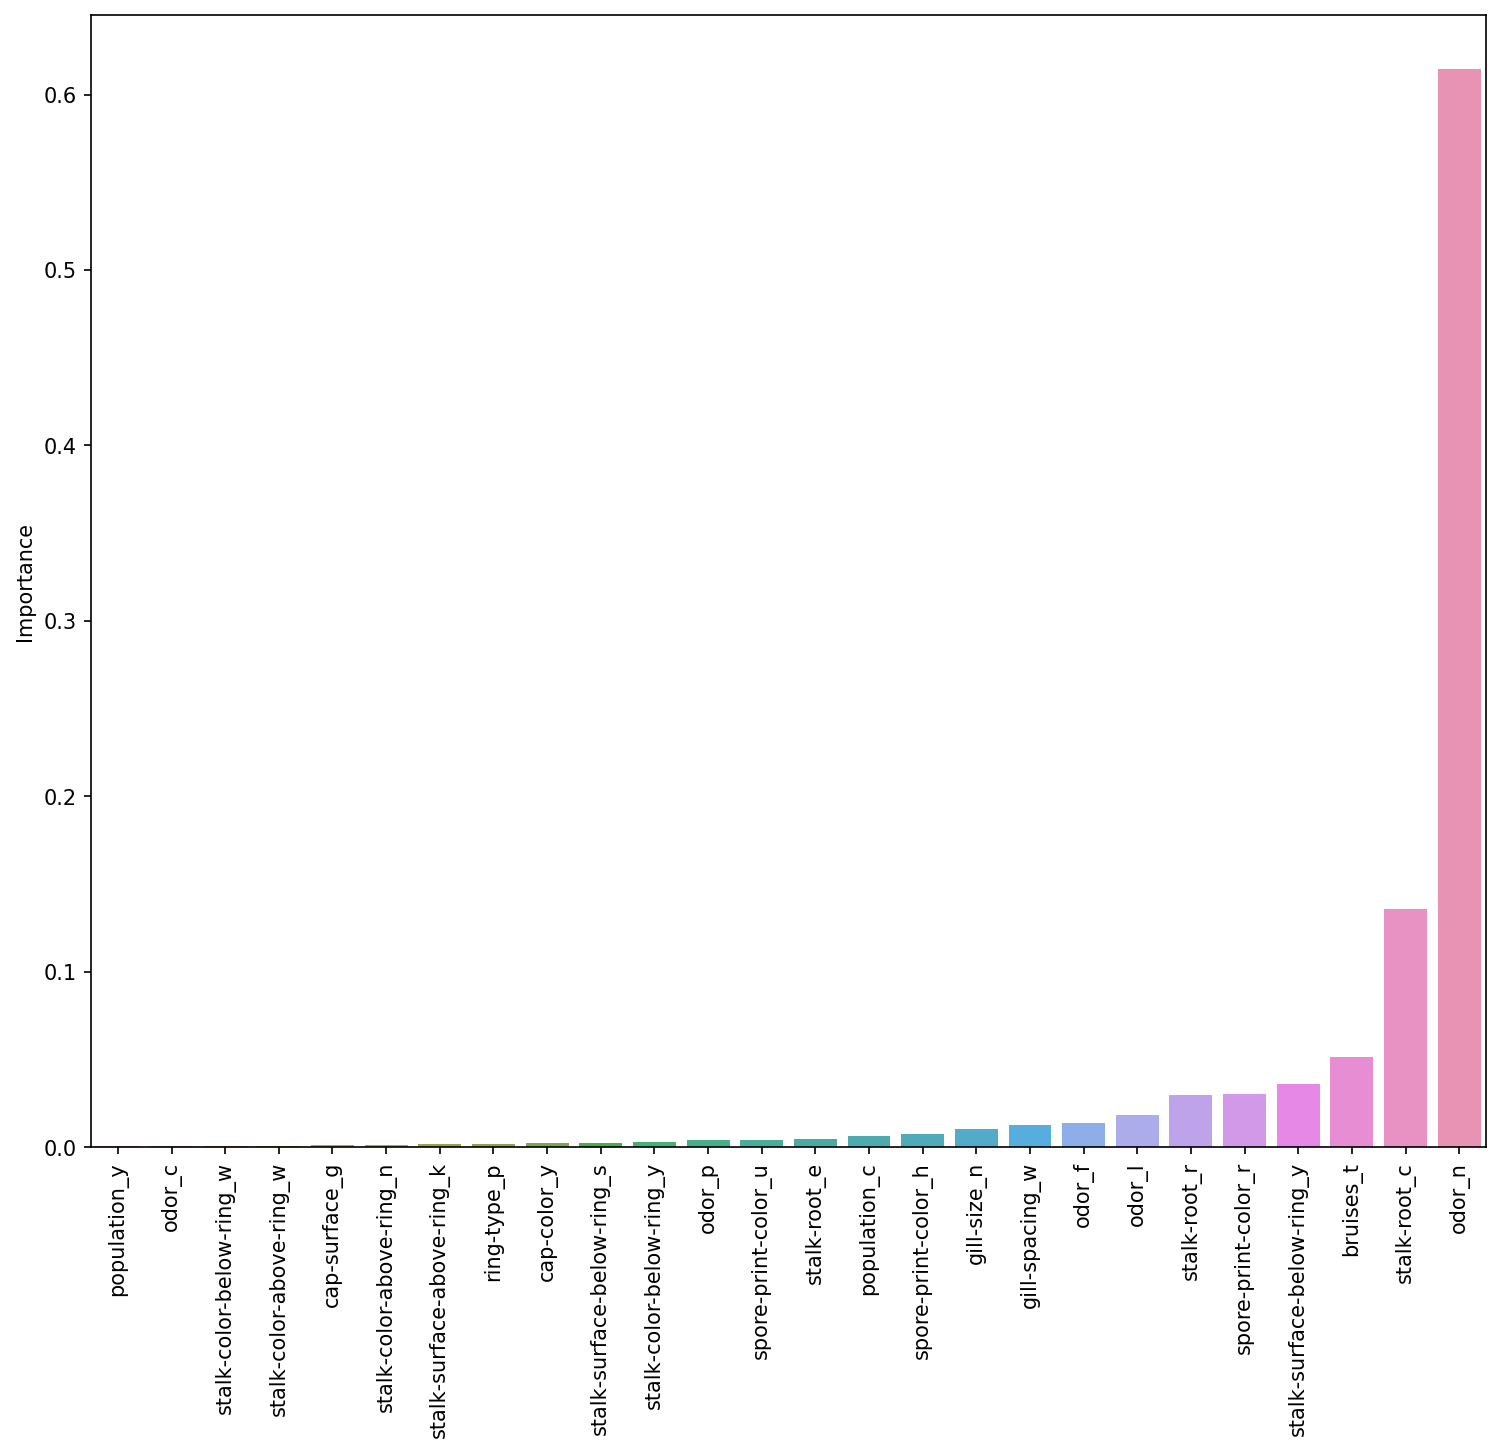

In [30]:
plt.figure(
    figsize=(12, 10),
    dpi=150
)
sns.barplot(data=imp_feat, x=imp_feat.index, y='Importance')
plt.xticks(
    rotation=90
);